# Understading features

Information Geometry Soft Clustering for Sport Analytics

Joaquin Garay

In [19]:
import pandas as pd
import socceraction.spadl as spadl
import matplotlib.pyplot as plt
import os

In [20]:
datafolder = "data"
fifa2018h5 = os.path.join(datafolder, "spadl-fifa2018.h5")

### What's inside?

In [21]:
with pd.HDFStore(fifa2018h5) as store:
    print(store.keys())

['/competitions', '/games', '/player_games', '/players', '/teams', '/actions/game_7525', '/actions/game_7529', '/actions/game_7530', '/actions/game_7531', '/actions/game_7532', '/actions/game_7533', '/actions/game_7534', '/actions/game_7535', '/actions/game_7536', '/actions/game_7537', '/actions/game_7538', '/actions/game_7539', '/actions/game_7540', '/actions/game_7541', '/actions/game_7542', '/actions/game_7543', '/actions/game_7544', '/actions/game_7545', '/actions/game_7546', '/actions/game_7547', '/actions/game_7548', '/actions/game_7549', '/actions/game_7550', '/actions/game_7551', '/actions/game_7552', '/actions/game_7553', '/actions/game_7554', '/actions/game_7555', '/actions/game_7556', '/actions/game_7557', '/actions/game_7558', '/actions/game_7559', '/actions/game_7560', '/actions/game_7561', '/actions/game_7562', '/actions/game_7563', '/actions/game_7564', '/actions/game_7565', '/actions/game_7566', '/actions/game_7567', '/actions/game_7568', '/actions/game_7569', '/actions

In [22]:
#Competitions
pd.read_hdf(fifa2018h5, key="competitions").head()

,season_id,competition_id,competition_name,country_name,competition_gender,season_name
30,3,43,FIFA World Cup,International,male,2018


In [23]:
#games
pd.read_hdf(fifa2018h5, key="games").head()

,game_id,season_id,competition_id,competition_stage,game_day,game_date,home_team_id,away_team_id,home_score,away_score,venue,referee
0,7585,3,43,Round of 16,4,2018-07-03 20:00:00,769,768,1,1,Otkritie Bank Arena,Mark Geiger
1,7570,3,43,Group Stage,3,2018-06-28 20:00:00,768,782,0,1,Stadion Kaliningrad,Damir Skomina
2,7586,3,43,Round of 16,4,2018-07-03 16:00:00,790,773,1,0,Saint-Petersburg Stadium,Damir Skomina
3,7557,3,43,Group Stage,3,2018-06-25 20:00:00,797,780,1,1,Mordovia Arena,Enrique Cáceres
4,7542,3,43,Group Stage,2,2018-06-20 14:00:00,780,788,1,0,Stadion Luzhniki,Mark Geiger


In [24]:
#player games
pd.read_hdf(fifa2018h5, key="player_games").head()

,player_id,game_id,team_id,is_starter,starting_position_id,starting_position_name,minutes_played
0,3094,7585,768,True,20,Left Attacking Midfield,84
1,3205,7585,768,True,3,Right Center Back,123
2,3233,7585,768,True,22,Right Center Forward,91
3,3244,7585,768,True,4,Center Back,132
4,3293,7585,768,True,18,Right Attacking Midfield,132


In [25]:
#players
pd.read_hdf(fifa2018h5, key="players").head()

,player_id,player_name,nickname
0,3094,Bamidele Alli,Dele Alli
1,3205,Kyle Walker,None
2,3233,Raheem Sterling,Raheem Sterling
3,3244,John Stones,None
4,3293,Jesse Lingard,None


In [26]:
#teams
pd.read_hdf(fifa2018h5, key="teams").head()
#France ID = 771

,team_id,team_name
0,768,England
1,769,Colombia
0,782,Belgium
0,773,Switzerland
1,790,Sweden


In [27]:
#actions
pd.read_hdf(fifa2018h5, key="actions/game_7525").head()

,game_id,original_event_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,type_id,result_id,bodypart_id,action_id
0,7525,e23943da-dc40-49f3-a7a0-e269288098c3,1,0.612,799,5196.0,52.0625,33.575,74.8125,32.725,0,1,5,0
1,7525,fd89c08f-16ad-4102-a3ab-4dd8d58ae687,1,1.732,799,5173.0,74.8125,32.725,73.9375,33.575,21,1,0,1
2,7525,c4ba0e20-8090-4285-945e-e2f9d136ae21,1,2.933,799,5173.0,73.9375,33.575,26.6875,13.175,0,0,5,2
3,7525,576d4649-3b45-4de2-b9f7-692c3d53a12d,1,5.893,796,5175.0,32.8125,10.625,38.9375,4.675,0,0,0,3
4,7525,a7a37529-06c3-462f-bab5-5135acfa524a,1,7.772,799,5178.0,38.9375,4.675,25.8125,4.675,0,1,4,4


### Location of actions

Like mentioned in SoccerMix paper, the locations in event stream data are approximations. For some actions, such as goal kicks and crosses, annotators use a set of predefined start locations instead of its actual location. It is possible to note those patterns on the following plots.

In [28]:
datafolder = "data"
fifa2018h5 = os.path.join(datafolder, "spadl-fifa2018.h5")
games = pd.read_hdf(fifa2018h5, key="games")
with pd.HDFStore(fifa2018h5) as store:
    actions = [] #list of DataFrames
    for game in games.itertuples():
        game_action = store[f"actions/game_{game.game_id}"]
        game_action = spadl.play_left_to_right(game_action, game.home_team_id)
        game_action["is_home"] = game_action["team_id"] == game.home_team_id
        actions.append(game_action)
    actions = pd.concat(actions)
    actions.drop("original_event_id", axis=1, inplace=True )
    actions = pd.merge(actions, spadl.config.actiontypes_df(), how="left")

In [29]:
set(actions["type_name"])

{'bad_touch',
 'clearance',
 'corner_crossed',
 'corner_short',
 'cross',
 'dribble',
 'foul',
 'freekick_crossed',
 'freekick_short',
 'goalkick',
 'interception',
 'keeper_claim',
 'keeper_punch',
 'keeper_save',
 'pass',
 'shot',
 'shot_freekick',
 'shot_penalty',
 'tackle',
 'take_on',
 'throw_in'}

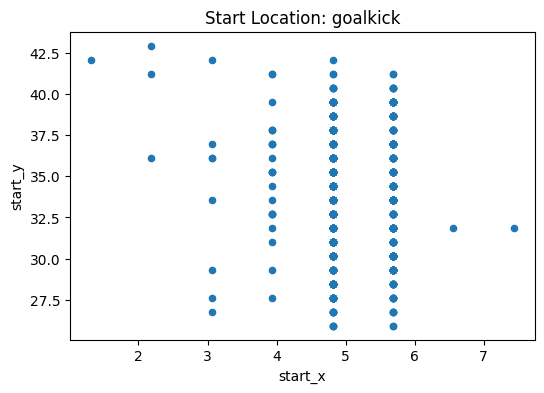

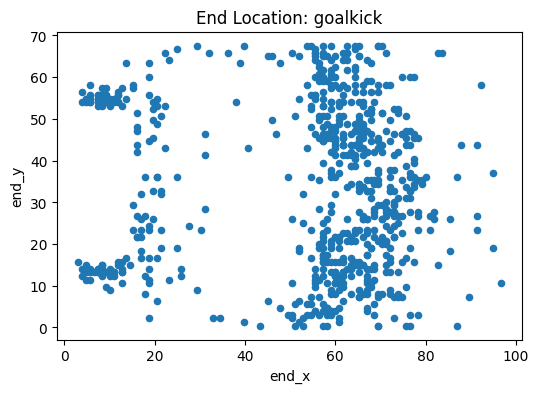

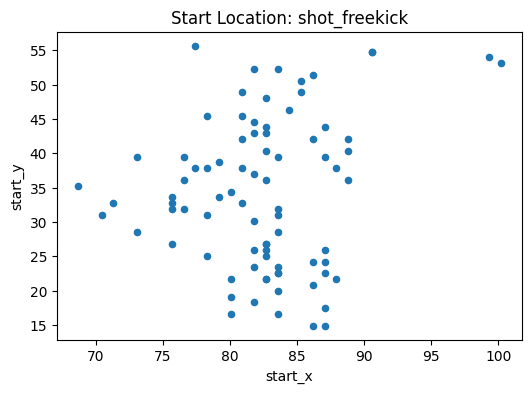

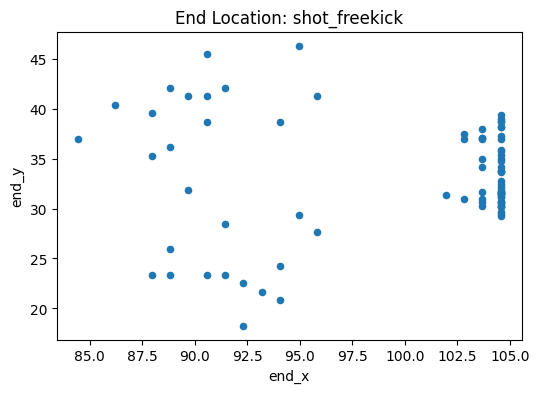

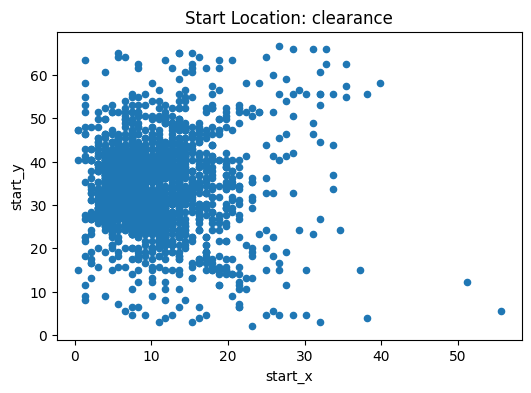

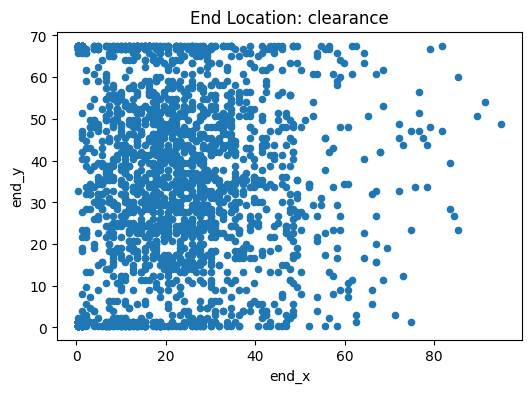

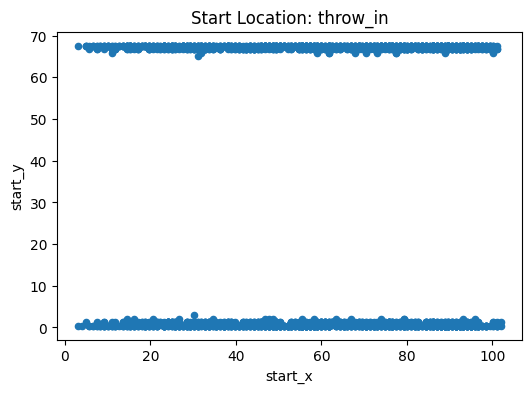

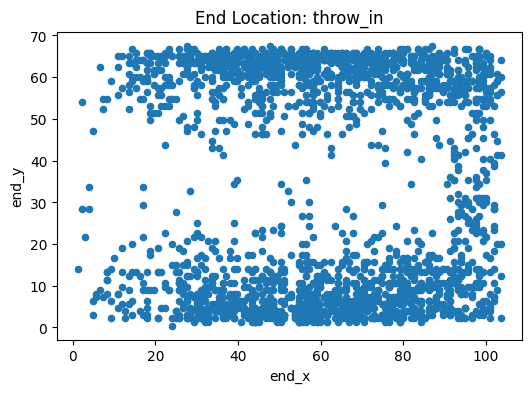

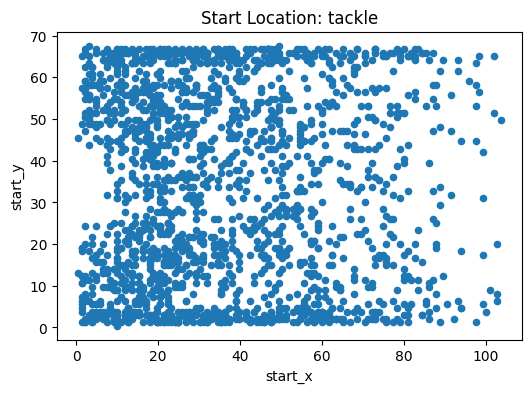

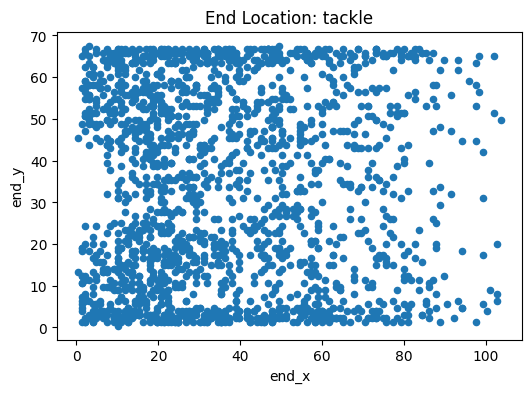

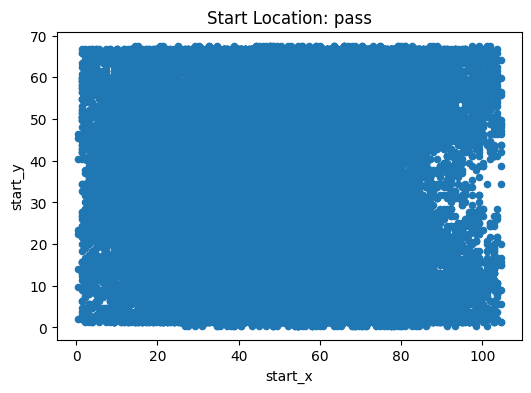

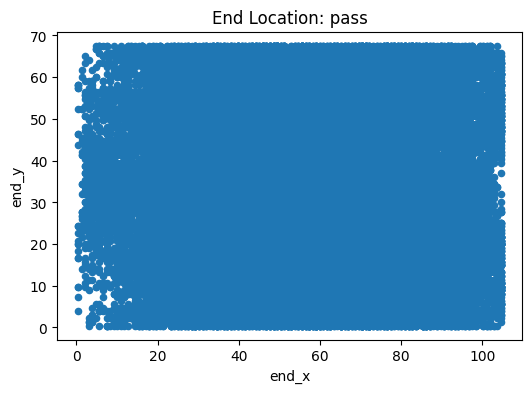

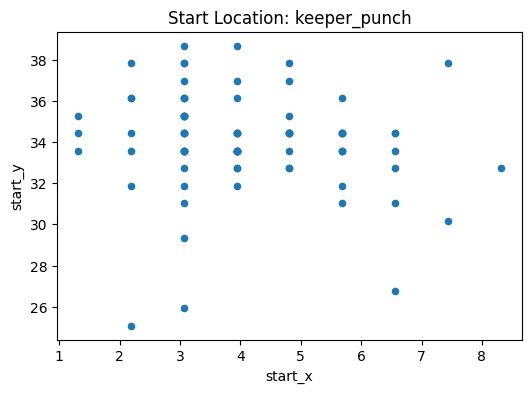

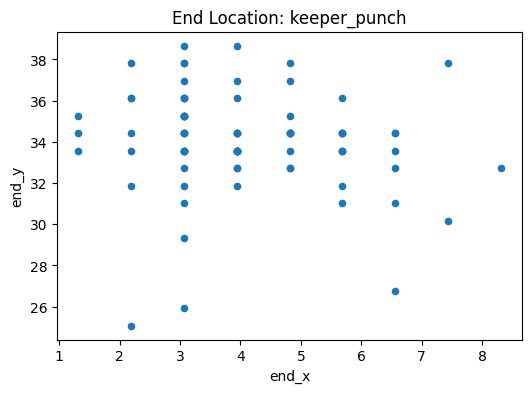

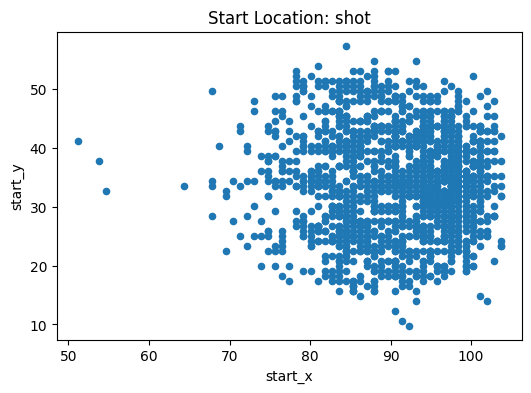

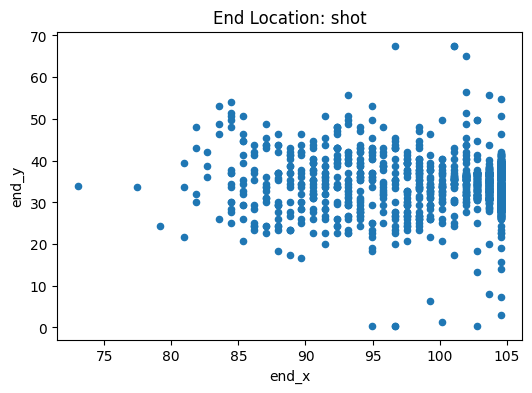

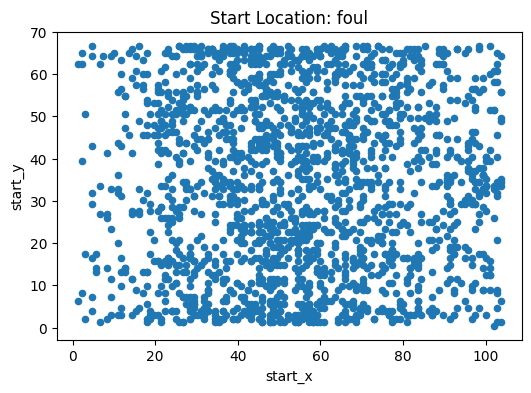

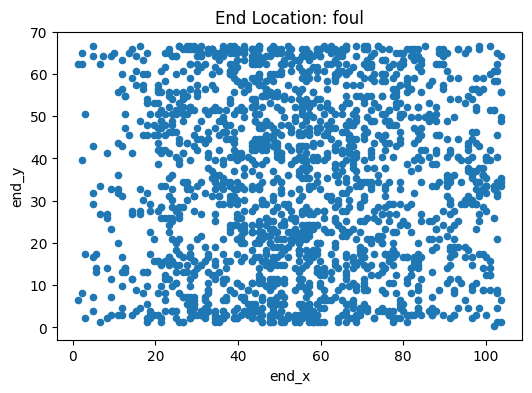

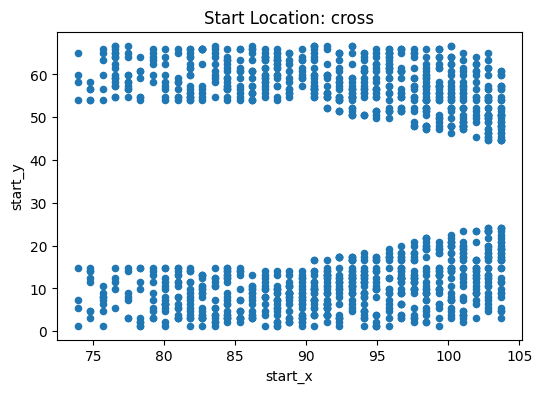

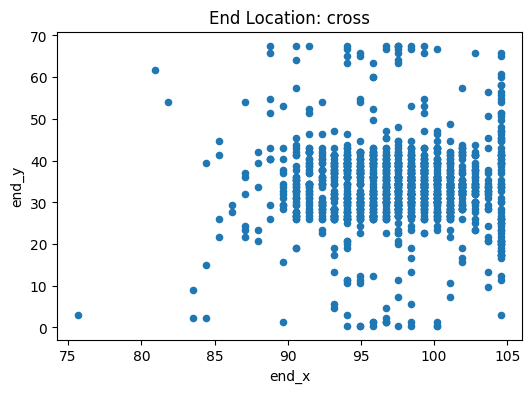

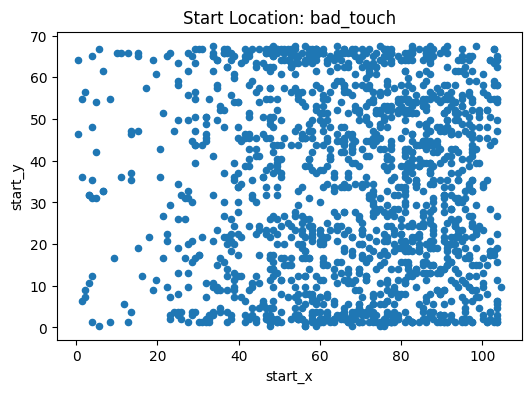

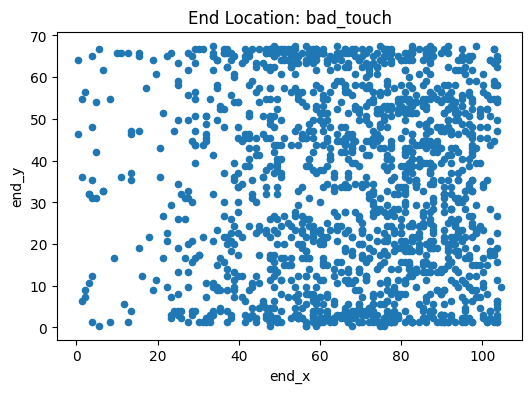

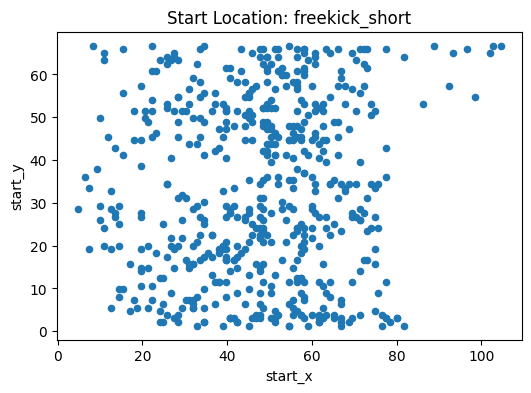

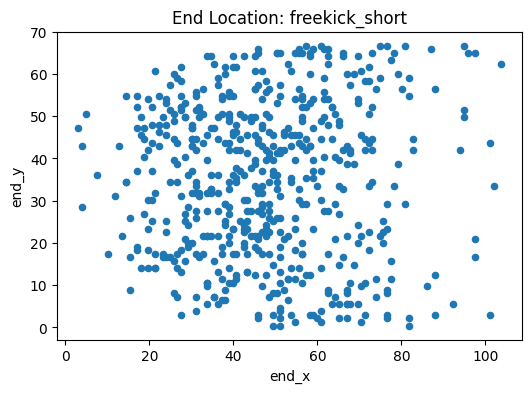

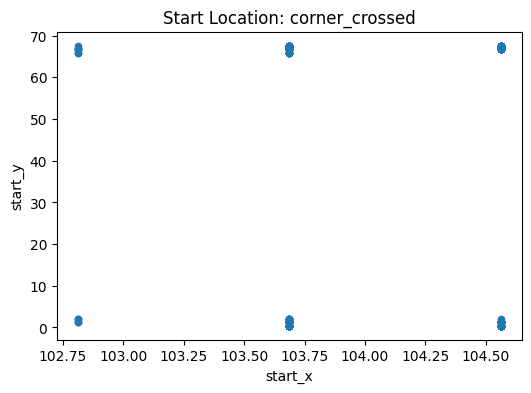

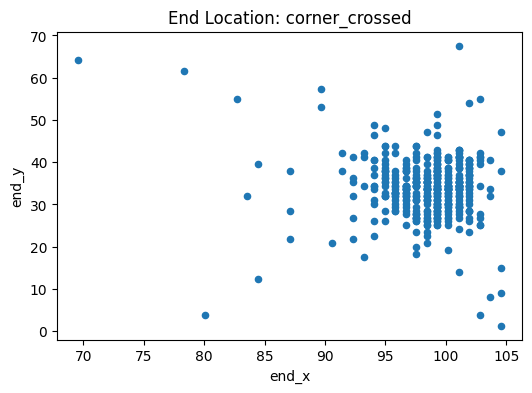

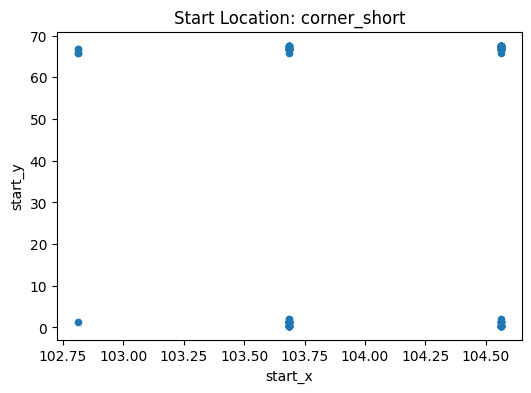

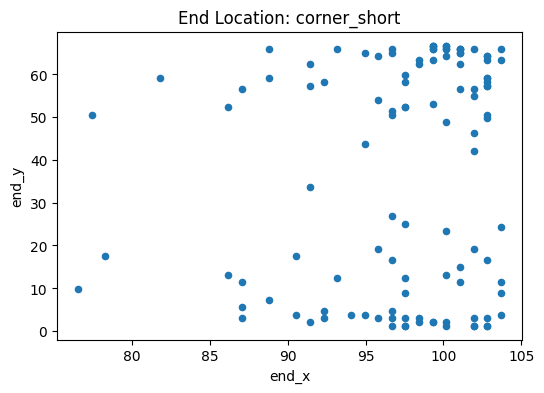

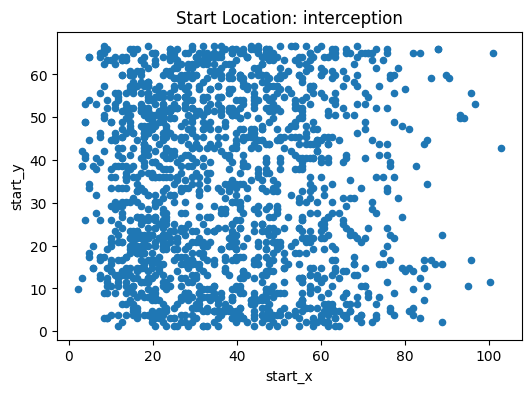

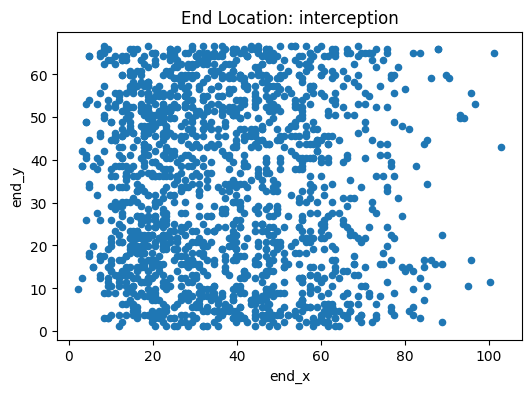

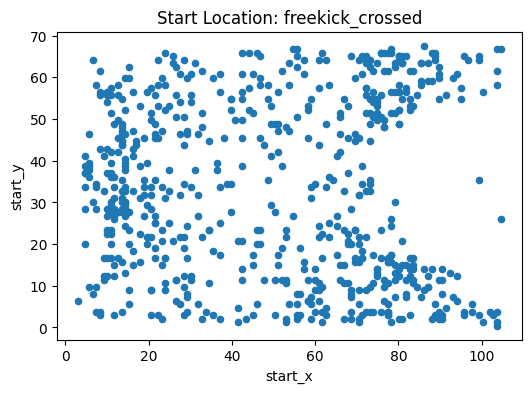

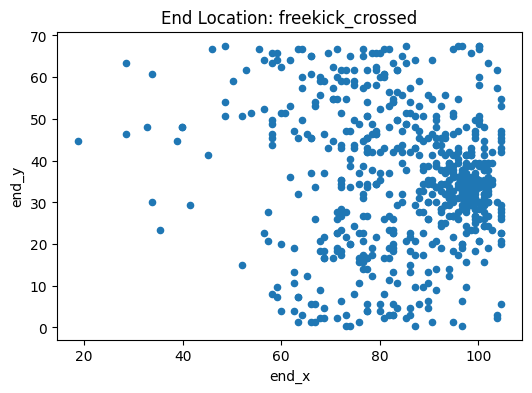

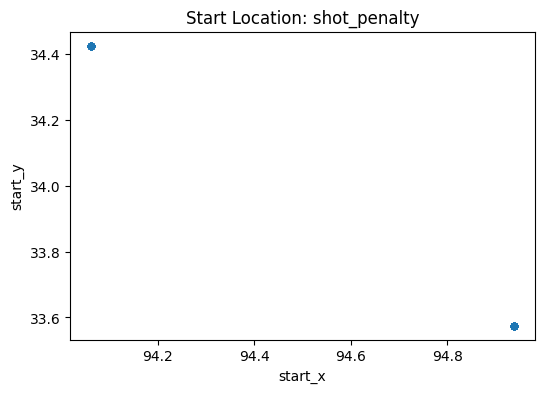

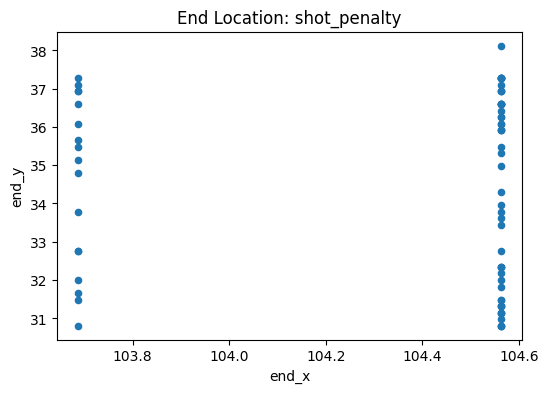

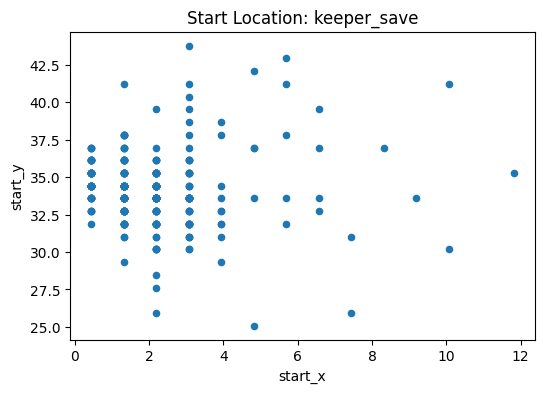

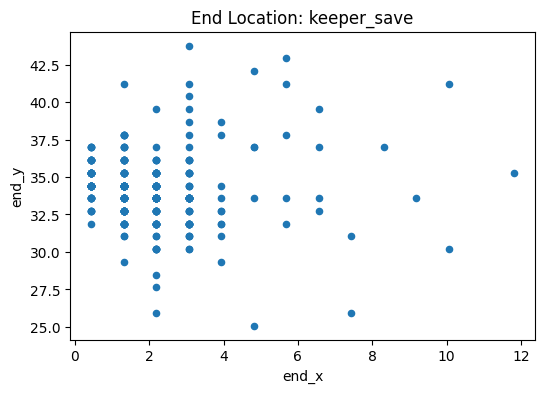

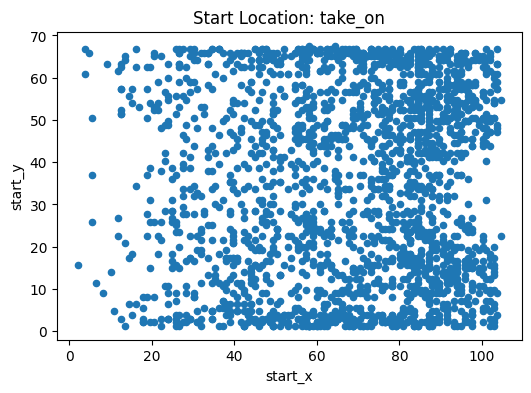

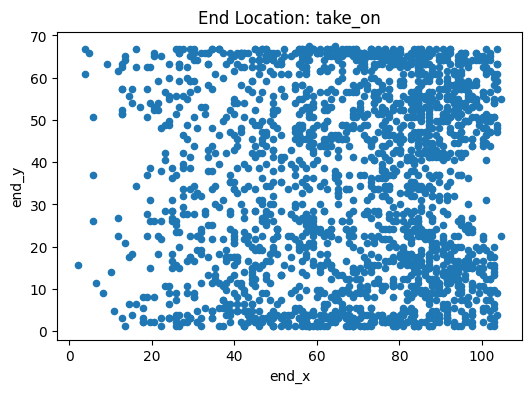

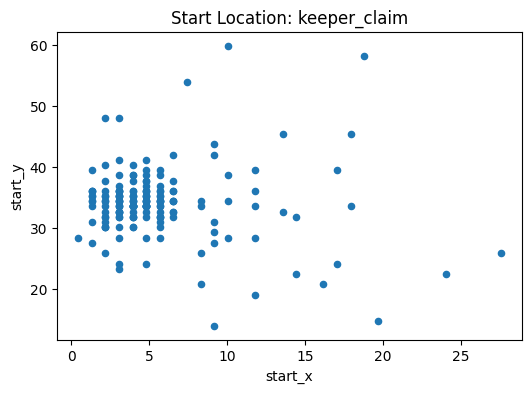

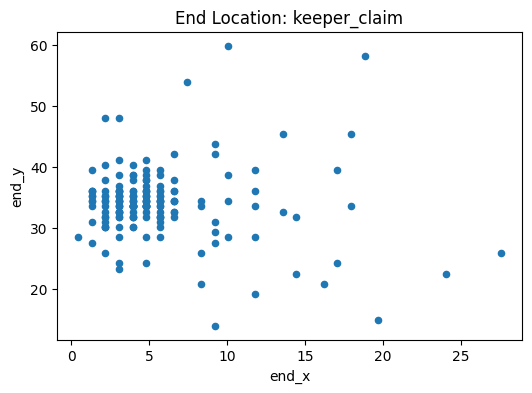

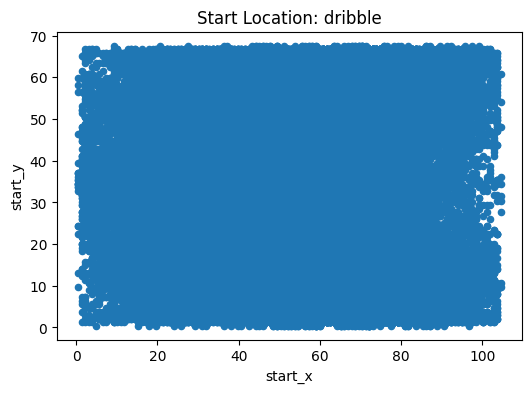

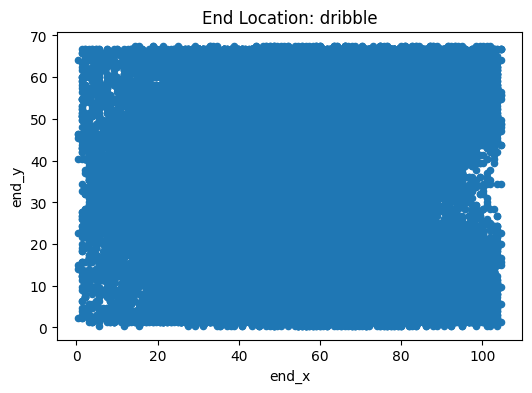

In [30]:
for actiontype in set(actions["type_name"]):
    actions[actions.type_name == actiontype].plot.scatter(
        x="start_x",
        y="start_y",
        title = f"Start Location: {actiontype}",
        figsize = (6,4)
    )
    plt.show()
    actions[actions.type_name == actiontype].plot.scatter(
        x="end_x",
        y="end_y",
        title = f"End Location: {actiontype}",
        figsize = (6,4)
    )
    plt.show()

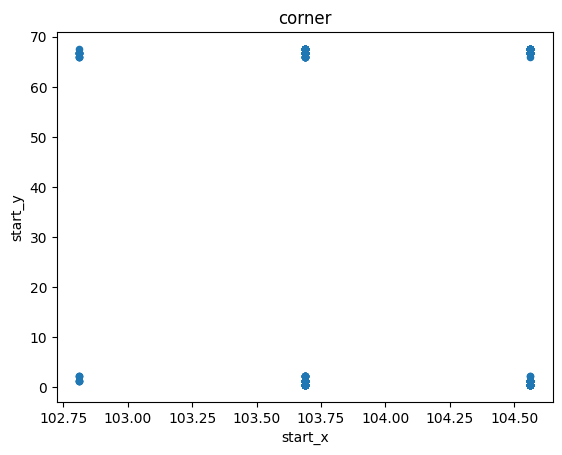

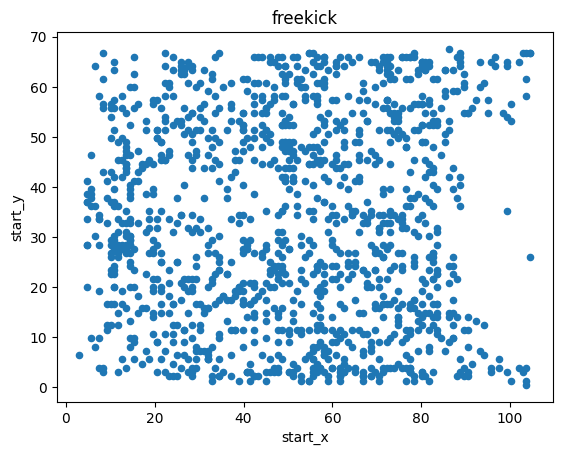

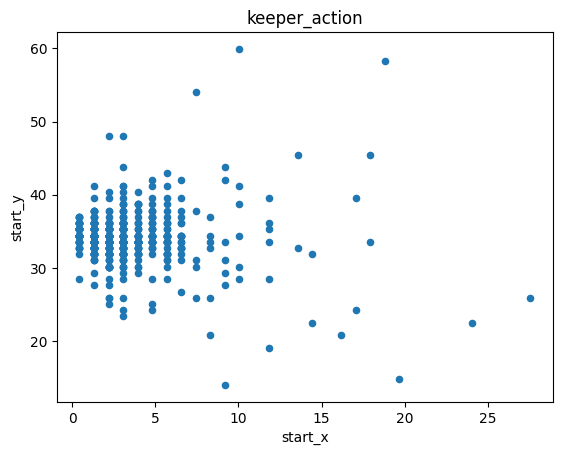

In [31]:
def consolidate(actions):
    #actions.fillna(0, inplace=True)

    #Consolidate corner_short and corner_crossed
    corner_idx = actions.type_name.str.contains("corner")
    actions["type_name"] = actions["type_name"].mask(corner_idx,"corner")

    #Consolidate freekick_short, freekick_crossed, and shot_freekick
    freekick_idx = actions.type_name.str.contains("freekick")
    actions["type_name"] = actions["type_name"].mask(freekick_idx,"freekick")

    #Consolidate keeper_claim, keeper_punch, keeper_save, keeper_pick_up
    keeper_idx = actions.type_name.str.contains("keeper")
    actions["type_name"] = actions["type_name"].mask(keeper_idx,"keeper_action")

    actions["start_x"] = actions["start_x"].mask(actions.type_name=="shot_penalty",94.5)
    actions["start_y"] = actions["start_y"].mask(actions.type_name=="shot_penalty",34)

    return actions

actions = consolidate(actions)
for actiontype in ["corner", "freekick", "keeper_action"]:
    actions[actions.type_name == actiontype].plot.scatter(
        x="start_x",
        y="start_y",
        title = f"{actiontype}"
    )
    plt.show()

### Analyzing one match

In [32]:
match = pd.read_hdf(fifa2018h5, key="actions/game_7585").drop("original_event_id", axis=1)
actiontypes_df = spadl.config.actiontypes_df()
results_df = spadl.results_df()
bodyparts_df = spadl.bodyparts_df()

In [33]:
match.describe()

,game_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,type_id,result_id,bodypart_id,action_id
count,2291.0,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000
mean,7585.0,1.978612,1147.373396,768.498472,4815.750327,52.990970,32.740212,53.052461,32.712589,9.770406,0.846355,2.232649,1145.000000
std,0.0,1.040228,856.410510,0.500107,1994.889334,23.925213,19.755970,24.463096,19.741948,9.953675,0.398642,2.336627,661.499055
min,7585.0,1.000000,0.240000,768.000000,3094.000000,0.437500,0.425000,0.437500,0.425000,0.000000,0.000000,0.000000,0.000000
25%,7585.0,1.000000,357.093000,768.000000,3308.000000,33.687500,15.725000,33.687500,15.725000,0.000000,1.000000,0.000000,572.500000
50%,7585.0,2.000000,931.653000,768.000000,3612.000000,54.687500,33.575000,54.687500,32.725000,7.000000,1.000000,1.000000,1145.000000
75%,7585.0,3.000000,1853.320000,769.000000,5691.000000,71.312500,48.875000,71.312500,48.875000,21.000000,1.000000,5.000000,1717.500000
max,7585.0,5.000000,3059.600000,769.000000,10960.000000,104.562500,67.575000,104.562500,67.575000,22.000000,4.000000,5.000000,2290.000000


In [34]:
actiontypes_df.head()

,type_id,type_name
0,0,pass
1,1,cross
2,2,throw_in
3,3,freekick_crossed
4,4,freekick_short


In [35]:
#Dribbles
match[match["type_id"] == 21 ]

,game_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,type_id,result_id,bodypart_id,action_id
1,7585,1,0.480,769,5692.0,43.3125,33.575,44.1875,34.425,21,1,0,1
3,7585,1,3.440,769,5685.0,40.6875,22.525,42.4375,21.675,21,1,0,3
5,7585,1,5.360,769,5696.0,56.4375,1.275,57.3125,2.125,21,1,0,5
9,7585,1,12.000,769,5689.0,83.5625,14.025,82.6875,14.025,21,1,0,9
11,7585,1,13.293,769,5696.0,80.0625,3.825,77.4375,12.325,21,1,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2266,7585,4,869.200,769,5691.0,49.4375,58.225,49.4375,57.375,21,1,0,2266
2269,7585,4,896.840,769,3445.0,72.1875,64.175,67.8125,63.325,21,1,0,2269
2273,7585,4,926.000,769,5689.0,65.1875,8.925,68.6875,13.175,21,1,0,2273
2276,7585,4,931.693,769,5691.0,90.5625,54.825,101.9375,56.525,21,1,0,2276


period_id
1    Axes(0.125,0.11;0.775x0.77)
2    Axes(0.125,0.11;0.775x0.77)
3    Axes(0.125,0.11;0.775x0.77)
4    Axes(0.125,0.11;0.775x0.77)
5    Axes(0.125,0.11;0.775x0.77)
Name: time_seconds, dtype: object

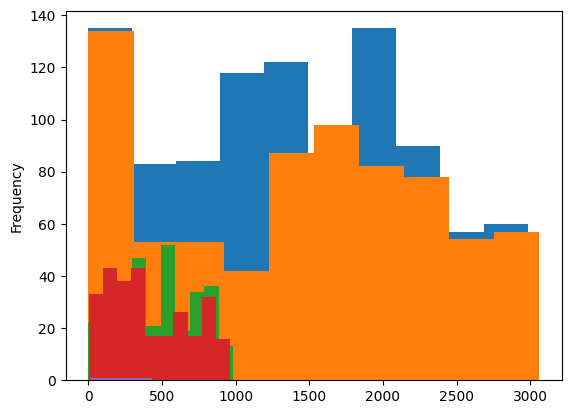

In [36]:
#two full-time halfs, and two 15-min suplementary halfs. timeperiod==5 should be penalties.
df_aux = match.groupby("period_id")
df_aux["time_seconds"].plot(kind="hist")